## Bibliotecas

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('bmh')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#df_sbgl = pd.read_csv('dataset-definitivo.csv')
df_sbgl = pd.read_csv('/content/drive/.shortcut-targets-by-id/18XekUWtMv8i936gGzDtDuU2L-HwY1nYu/Projeto Névoa/2-bases-preparacao-dos-dados/dataset-definitivo.csv').rename(columns={'velocidade-vento(mps)': 'velocidade_vento(m/s)'})
df_sbgl.columns = [i.replace('-', '_') for i in df_sbgl.columns]

display(df_sbgl.head())

#df_sbst = pd.read_csv('metar-SBST-2011-01-01-2025-07-02.csv')
df_sbst = pd.read_csv('/content/drive/.shortcut-targets-by-id/18XekUWtMv8i936gGzDtDuU2L-HwY1nYu/Projeto Névoa/2-bases-preparacao-dos-dados/metars/metar-SBST-2011-01-01-2025-07-02.csv')
df_sbst.columns = [i.replace('-', '_') for i in df_sbst.columns]
display(df_sbst.head())

,datetime,temp_agua(c),temp_ar(c),ponto_orvalho(c),velocidade_vento(m/s),dir_vento(graus),vis(m),pressao(mb),umidade_rel
0,2011-01-01 00:00:00,25.252,26.0,23.0,2.572220,140.0,10000.0,1007.0,0.84
1,2011-01-01 01:00:00,25.220,26.0,23.0,2.572220,110.0,10000.0,1008.0,0.84
2,2011-01-01 02:00:00,25.186,25.0,22.0,2.572220,90.0,10000.0,1008.0,0.83
3,2011-01-01 03:00:00,25.152,25.0,23.0,1.543332,160.0,10000.0,1007.0,0.89
4,2011-01-01 04:00:00,25.117,25.0,23.0,2.057776,100.0,10000.0,1007.0,0.89


,datetime,tipo_report,id_estacao,temp_ar(c),ponto_orvalho(c),velocidade_vento(m/s),dir_vento(graus),vis(m),pressao(mb)
0,2011-01-02 08:00:00,METAR,SBST,23.0,21.0,5.144440,330.0,3000.0,1006.0
1,2011-01-02 09:00:00,METAR,SBST,23.0,21.0,5.144440,340.0,2000.0,1006.0
2,2011-01-02 10:00:00,METAR,SBST,23.0,21.0,2.057776,340.0,4000.0,1006.0
3,2011-01-02 11:00:00,METAR,SBST,23.0,21.0,4.115552,10.0,4000.0,1007.0
4,2011-01-02 12:00:00,METAR,SBST,24.0,21.0,5.144440,340.0,3000.0,1007.0



## Limpeza dos dados

Remove as linhas com valores ausentes


In [24]:
df_sbgl_limpo = df_sbgl.dropna()
df_sbst_limpo = df_sbst.dropna()

print(f'formato dodf_sbgl original: {df_sbgl.shape}')
print(f'formato do df_sbgl limpo: {df_sbgl_limpo.shape}')
print(f'formato do df_sbst original: {df_sbst.shape}')
print(f'formato do df_sbst limpo: {df_sbst_limpo.shape}')

formato dodf_sbgl original: (124583, 9)
formato do df_sbgl limpo: (122683, 9)
formato do df_sbst original: (75570, 9)
formato do df_sbst limpo: (70034, 9)


In [25]:
#remove colunas irrelevantes
df_sbst = df_sbst.drop (['tipo_report', 'id_estacao'], axis=1)

## Box plots

Gerar os bloxplots para cada feature numerica nos dois datafranes, pra visualizar distribuição e outliers.


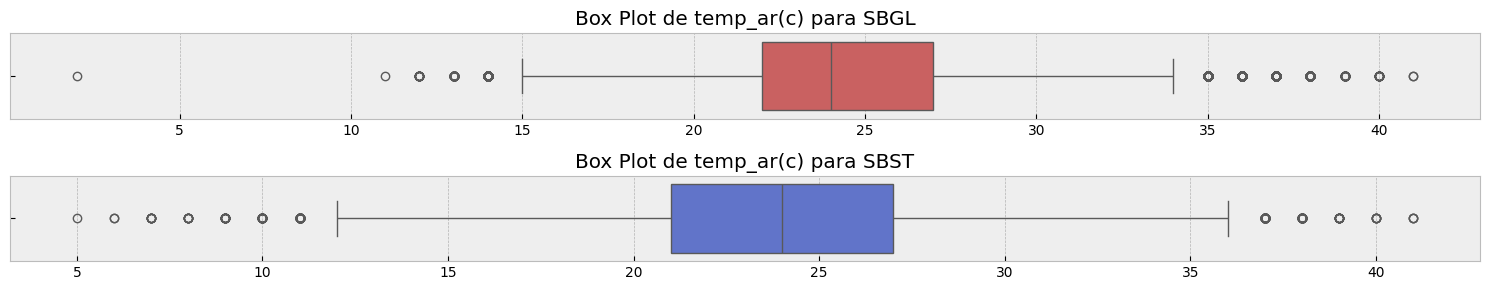

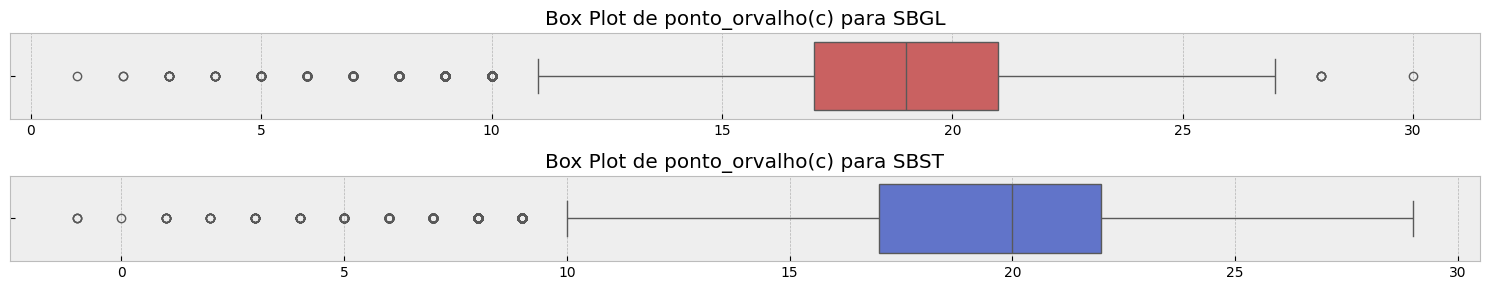

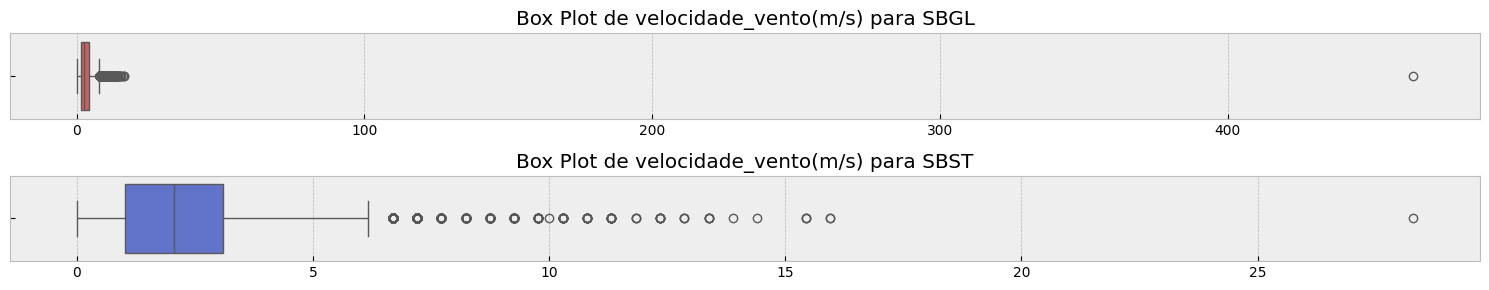

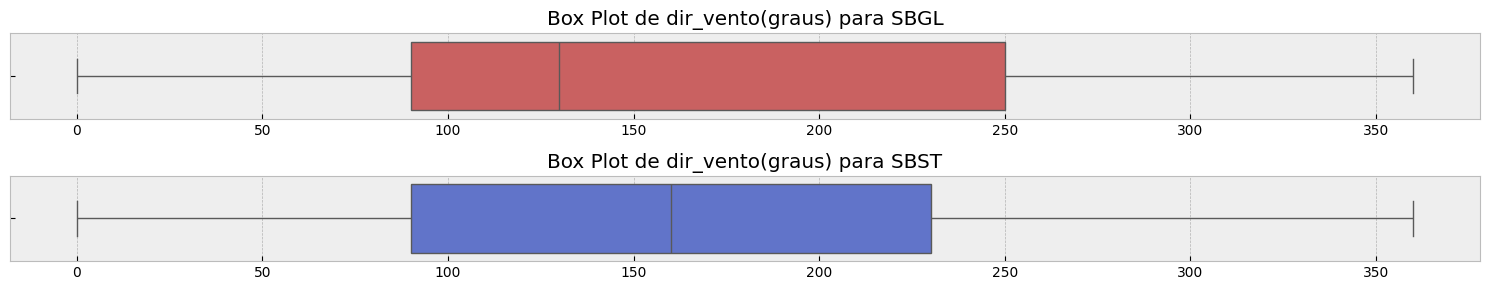

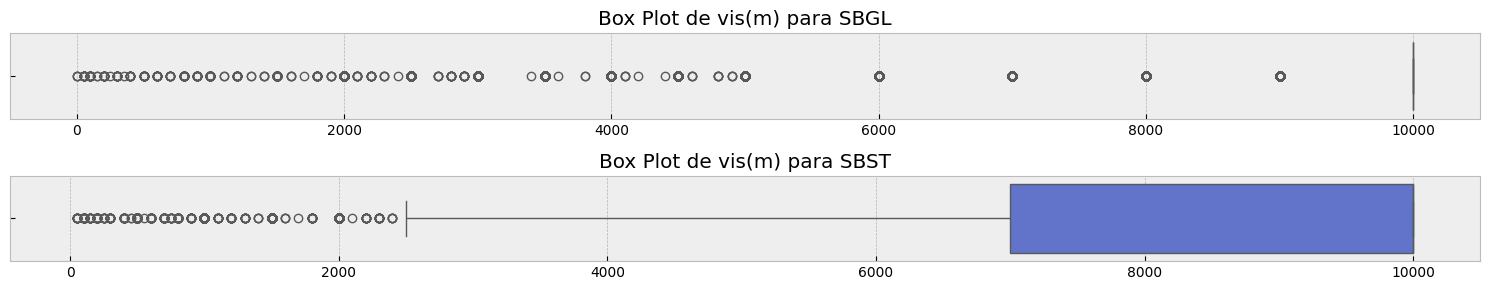

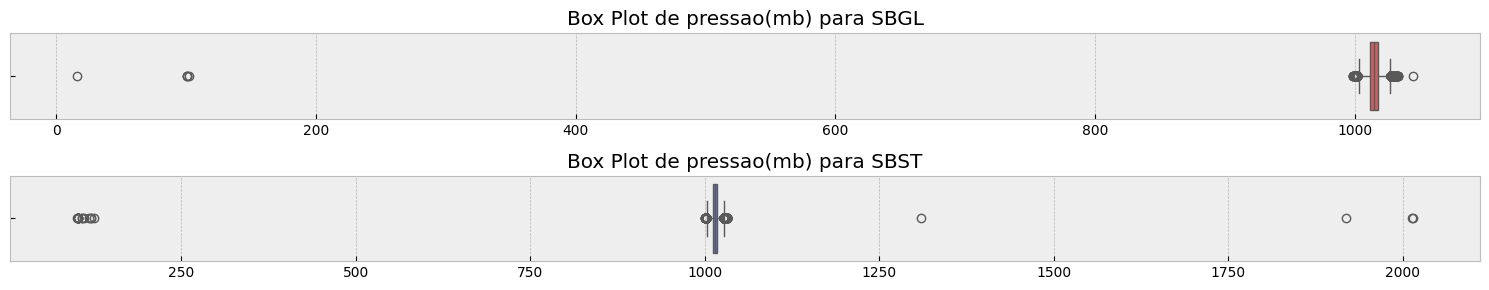

In [26]:
col_numericas = ['temp_ar(c)', 'ponto_orvalho(c)', 'velocidade_vento(m/s)', 'dir_vento(graus)', 'vis(m)', 'pressao(mb)']

for col in col_numericas:
    fig, axes = plt.subplots(2, 1, figsize=(15, 3))

    sns.boxplot(x=df_sbgl_limpo[col], ax=axes[0], color='#db4f4f')
    axes[0].set_title(f'Box Plot de {col} para SBGL')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')


    sns.boxplot(x=df_sbst_limpo[col], ax=axes[1], color='#4f69db')
    axes[1].set_title(f'Box Plot de {col} para SBST')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

## Histogramas

gerar histogramas para as temperatura, velocidade e pressao em ambos os dataframes para visualizar suas distribuicoes.


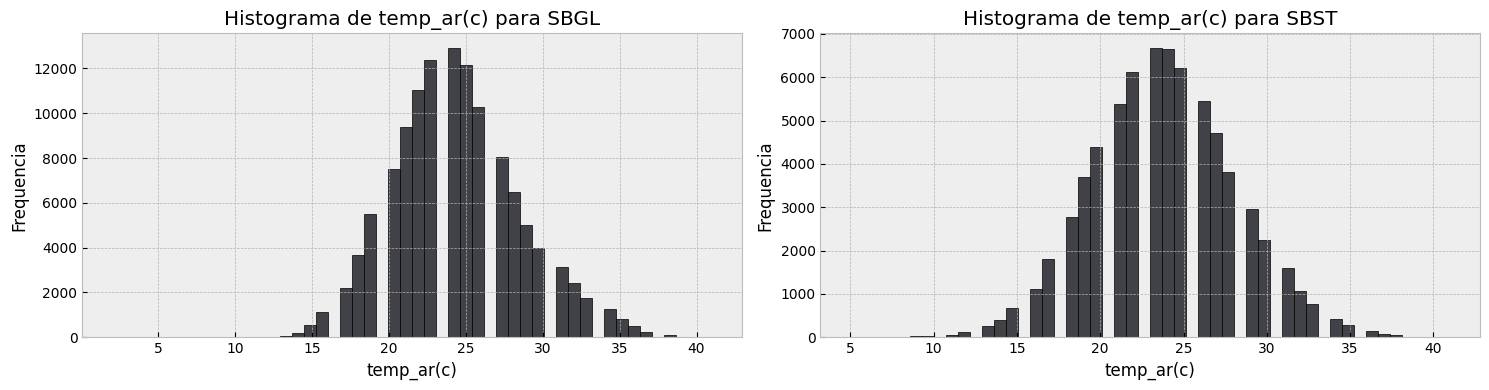

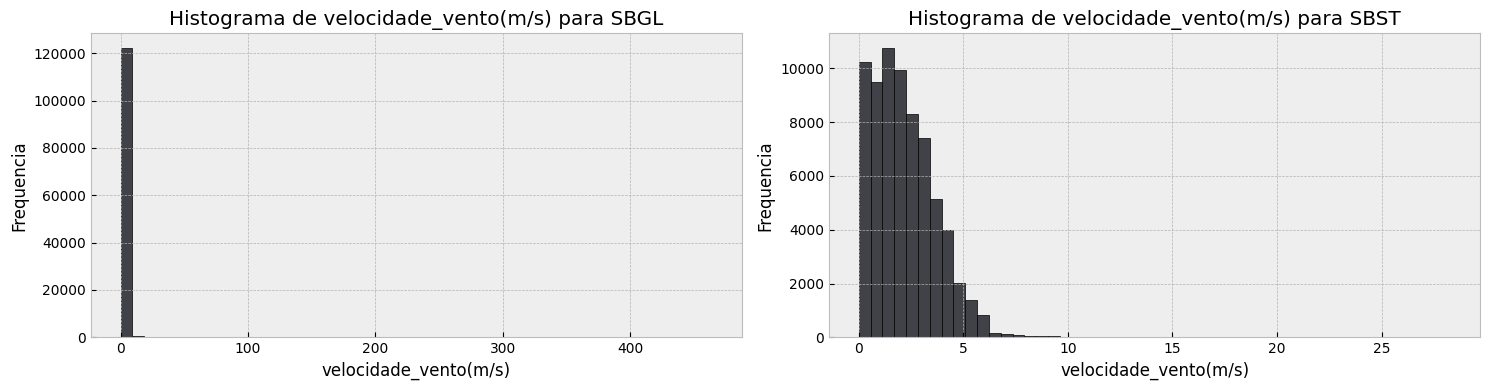

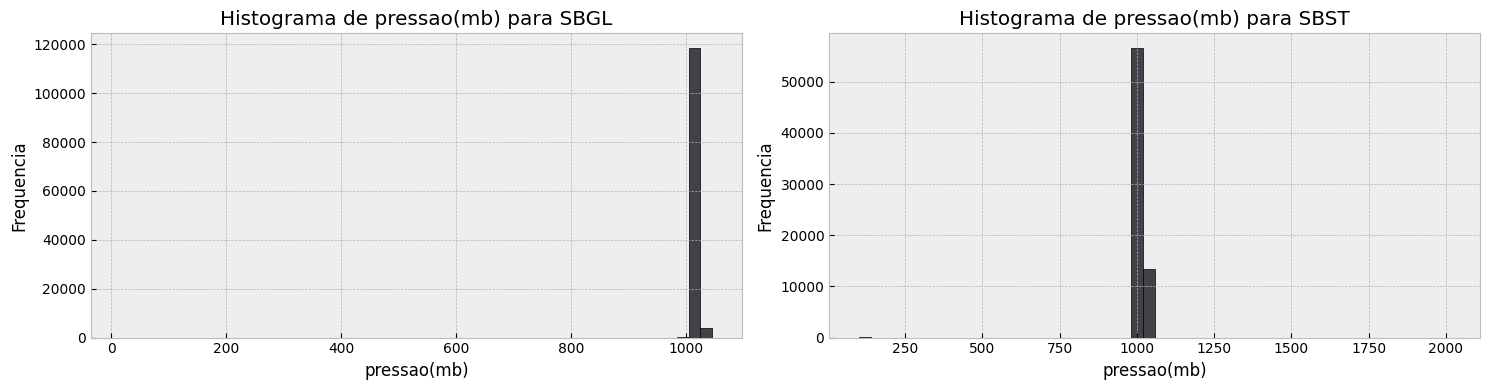

In [32]:
colunas_histograma = ['temp_ar(c)', 'velocidade_vento(m/s)', 'pressao(mb)']

for col in colunas_histograma:
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))

    axes[0].hist(df_sbgl_limpo[col].dropna(), bins=50, edgecolor='black', color='#404248')
    axes[0].set_title(f'Histograma de {col} para SBGL')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequencia')

    axes[1].hist(df_sbst_limpo[col].dropna(), bins=50, edgecolor='black', color='#404248')
    axes[1].set_title(f'Histograma de {col} para SBST')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Frequencia')

    plt.tight_layout()
    plt.show()

## grafico de pares


gerar um grafico de pares para os recursos numericos continuos em ambos os dataframespara visualizar as relações entre os pares.

In [ ]:
var_continuas = ['temp_ar(c)', 'ponto_orvalho(c)', 'velocidade_vento(m/s)', 'vis(m)', 'pressao(mb)']

sns.pairplot(df_sbgl_limpo[var_continuas])
plt.suptitle('Grafico de pares SBGL (variaveis continuas)', y=1.02)
plt.show()

sns.pairplot(df_sbst_limpo[var_continuas])
plt.suptitle('grafico de pares SBST (variaveis continuas)', y=1.02)
plt.show()

## Matriz de correlacao


In [14]:
#identifica dataframes
df_sbgl_limpo = df_sbgl_limpo.add_suffix('_sbgl')
df_sbst_limpo = df_sbst_limpo.add_suffix('_sbst')

#combina datframes
df_combinado = pd.concat([df_sbgl_limpo, df_sbst_limpo], axis=1, )

df_combinado= df_combinado.drop(df_combinado.columns[1], axis=1)

In [ ]:
df_combinado = df_sbgl_limpo.merge(df_sbst_limpo, left_on='datetime_sbgl', right_on='datetime_sbst', how='inner')

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_combinado.corr(numeric_only=True)

# Filter the correlation matrix to only show correlations between variables from different dataframes
# We can achieve this by selecting columns with one suffix and rows with the other suffix.
# For example, columns ending in '_sbgl' and rows ending in '_sbst'.
corr_matrix_filtered = corr_matrix.loc[corr_matrix.index.str.endswith('_sbst'), corr_matrix.columns.str.endswith('_sbgl')]

display(corr_matrix_filtered)

In [ ]:
plt.figure(figsize=(10, 3))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de correlação SBST - SBSG')
plt.show()

In [ ]:
#santos
corr_matrix = df_combinado.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlação SBST - SBSG')
plt.show()

## Analise por Estações do Ano

adicionar coluna estacao com base na coluna datetime para analise sazional

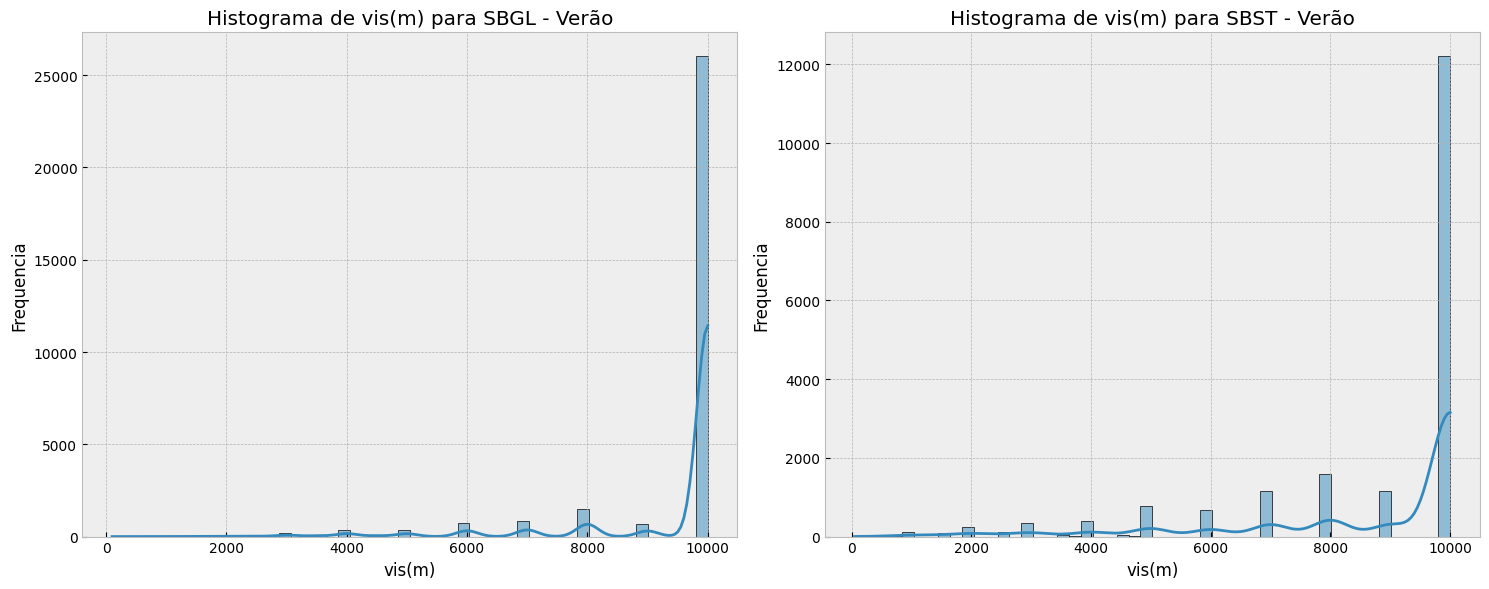

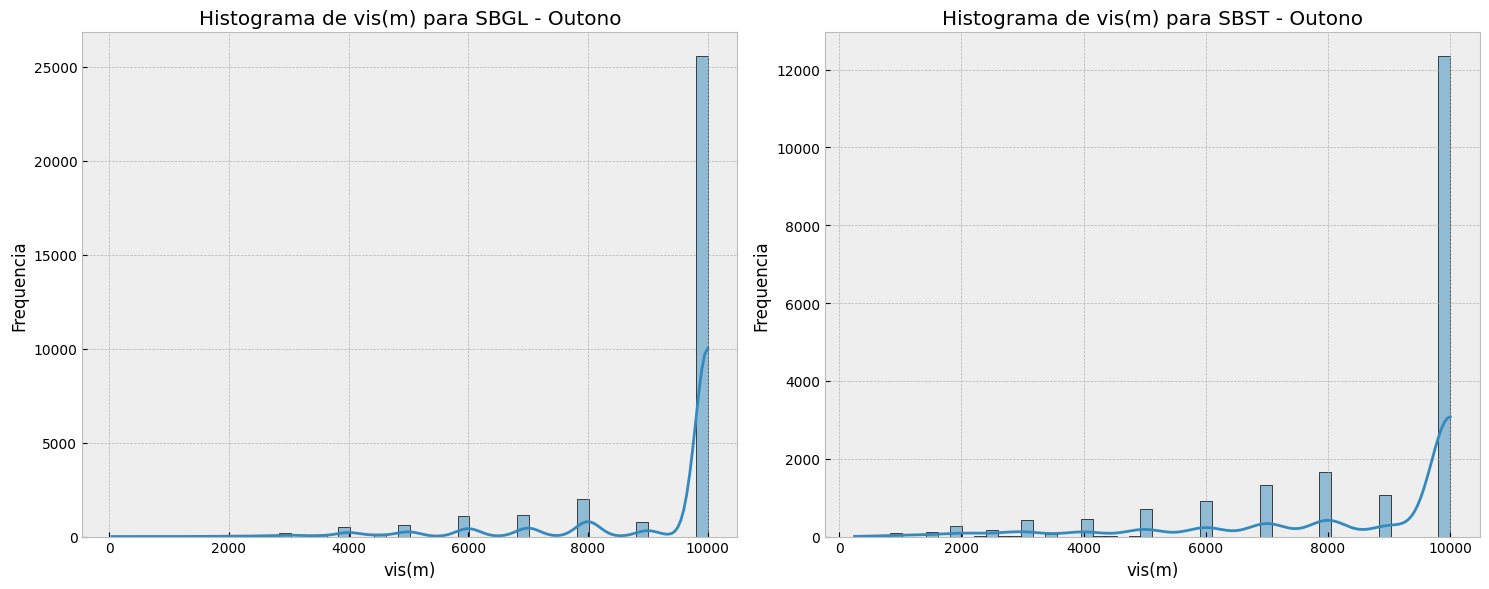

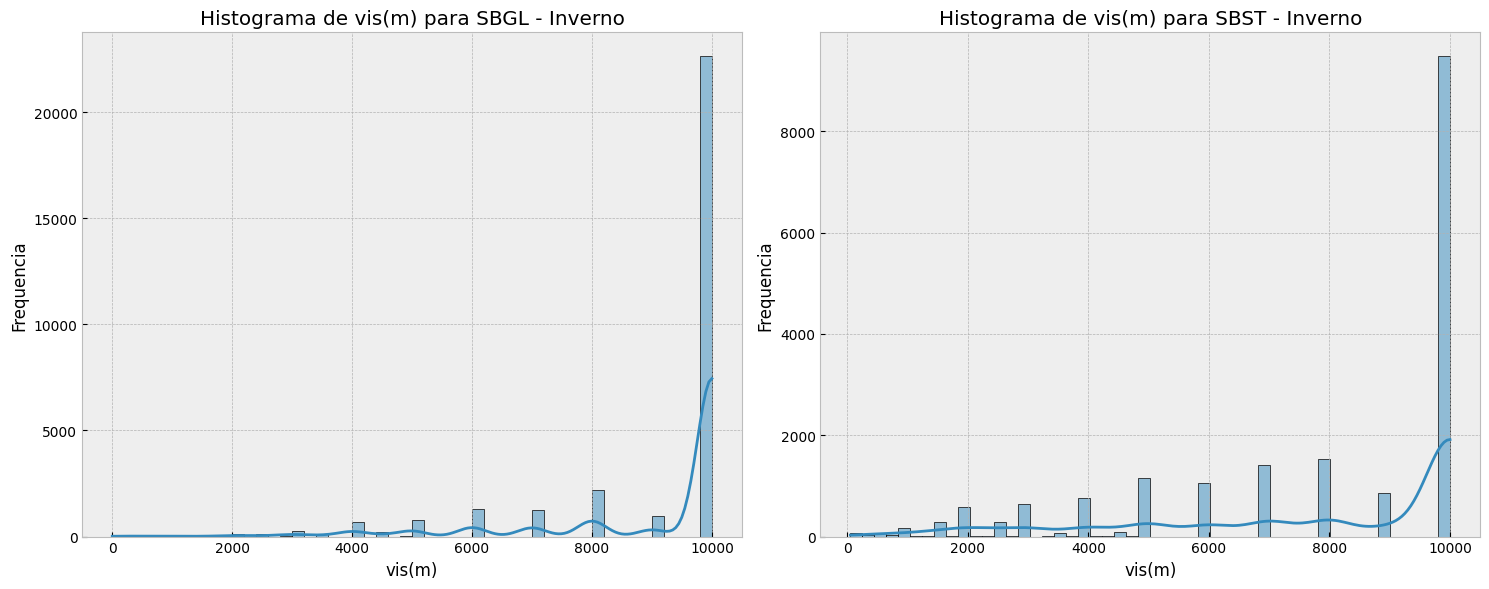

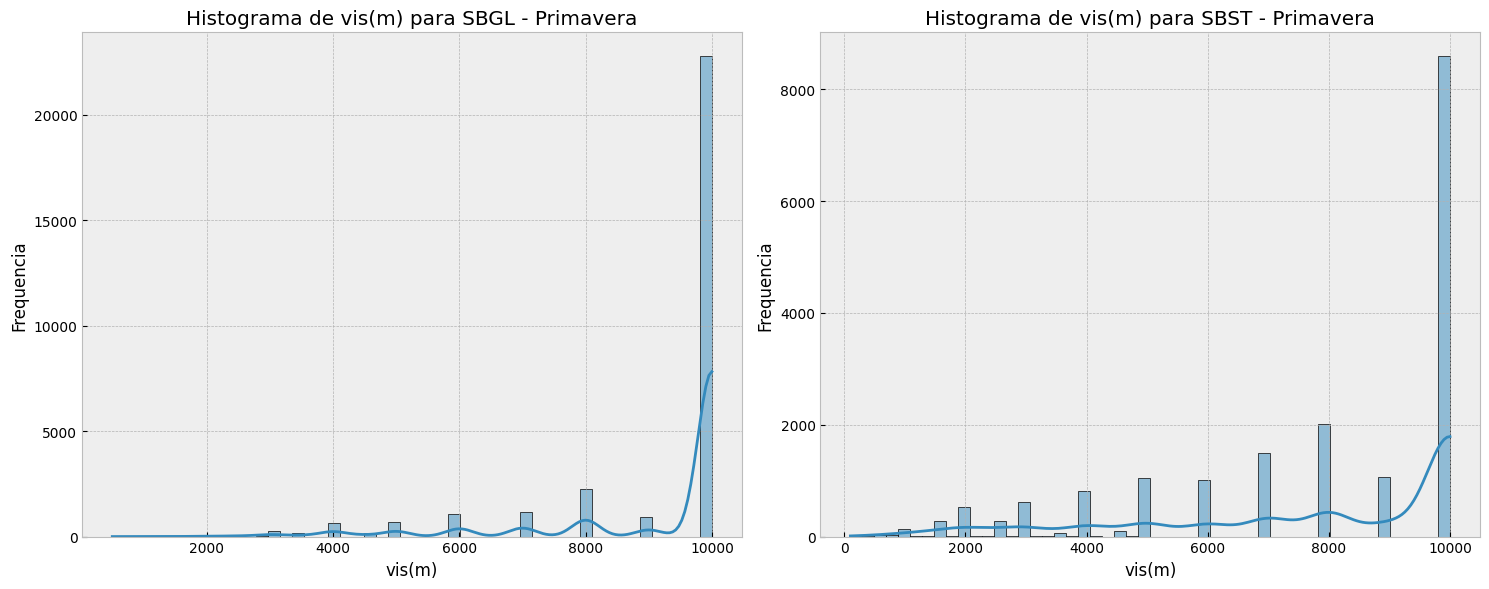

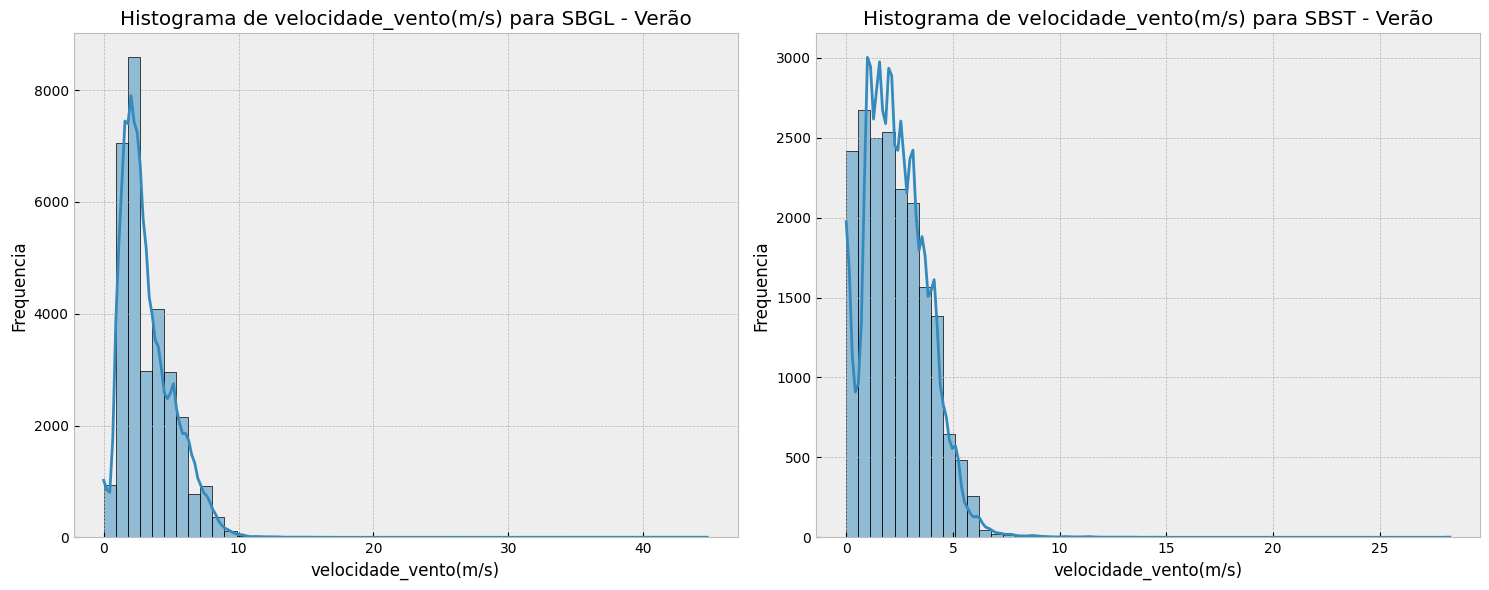

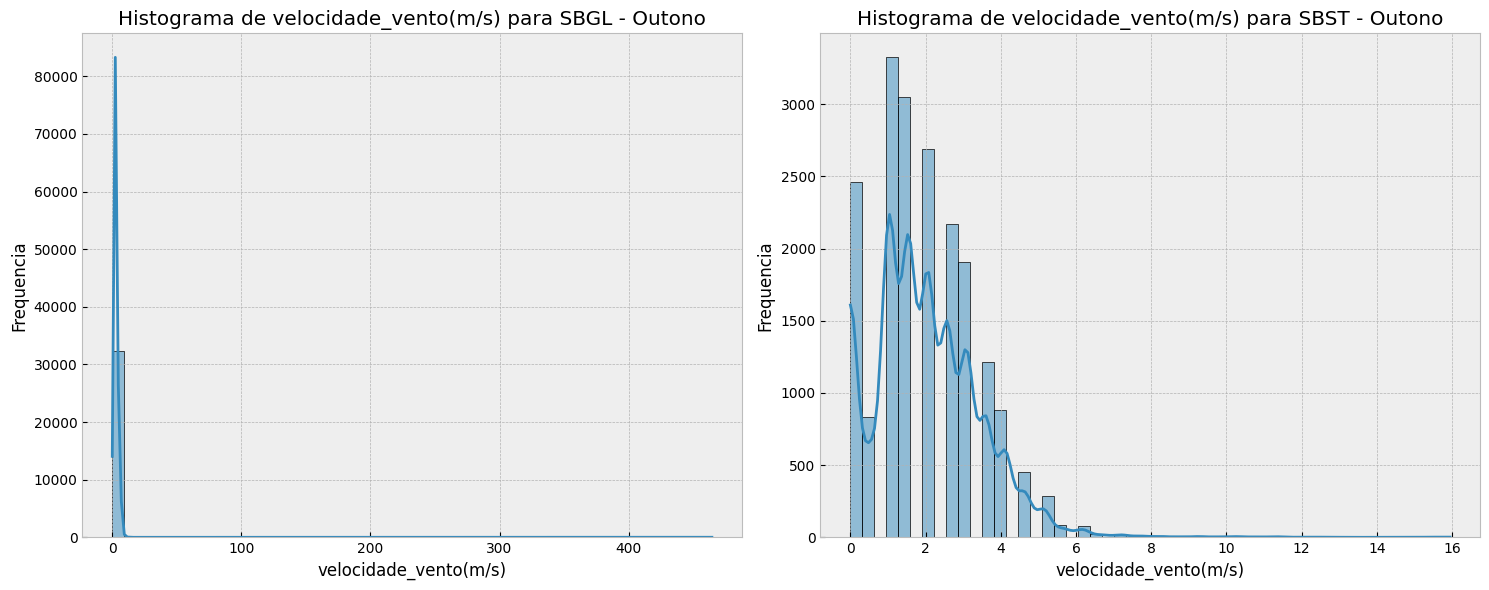

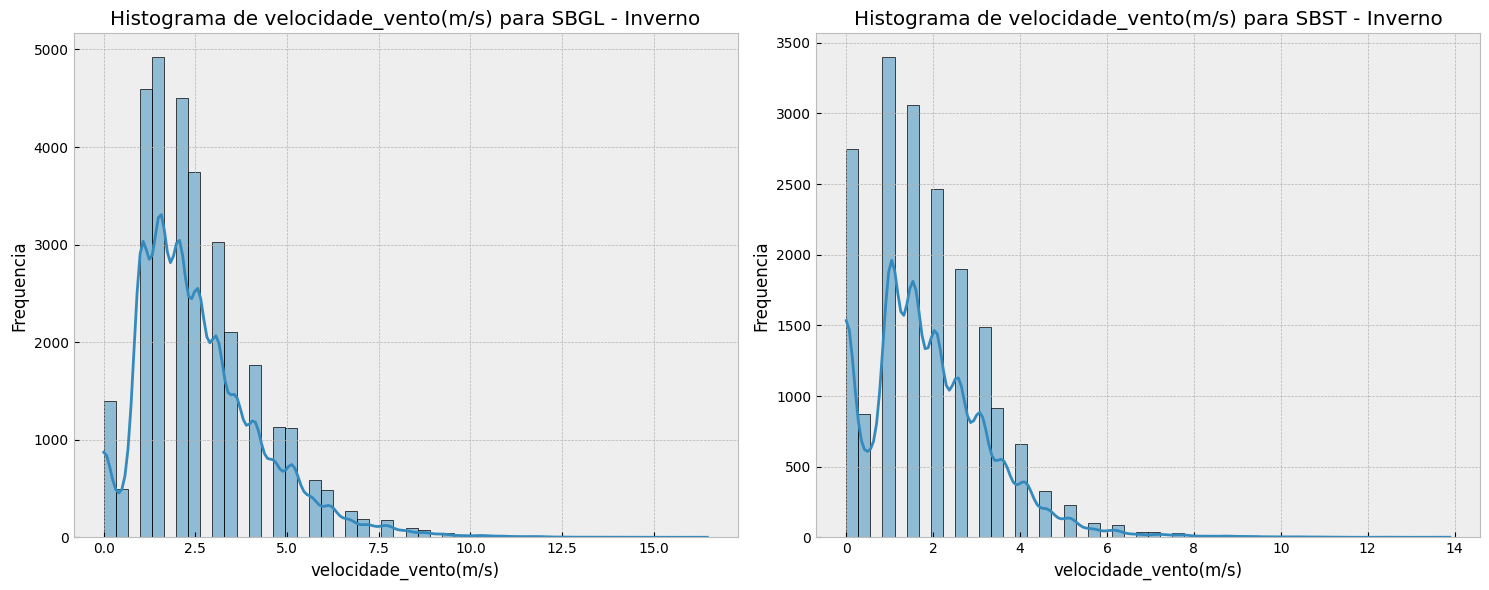

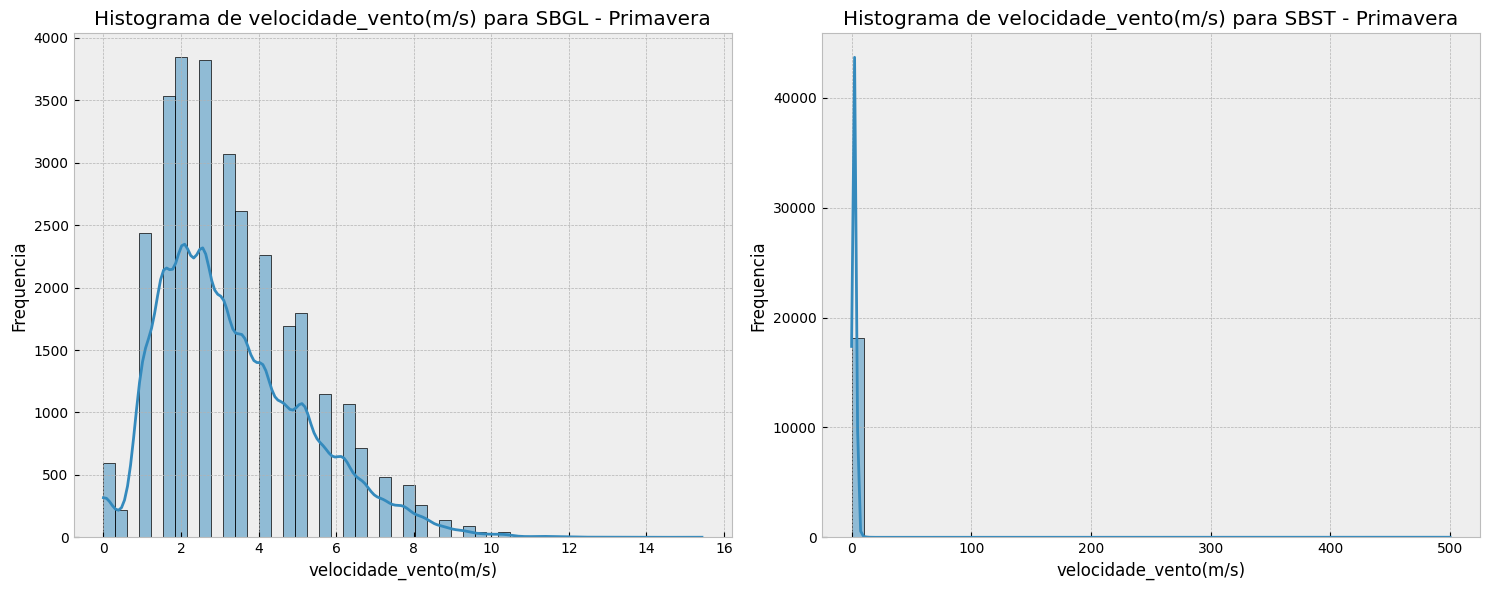

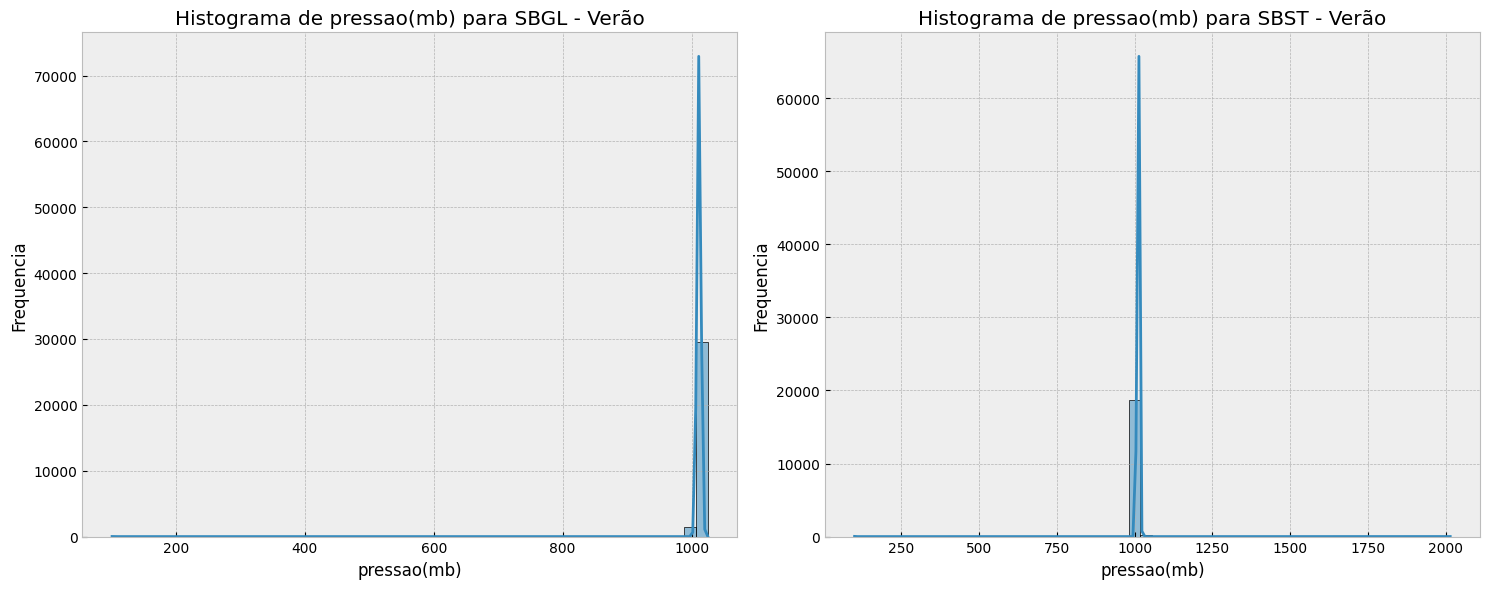

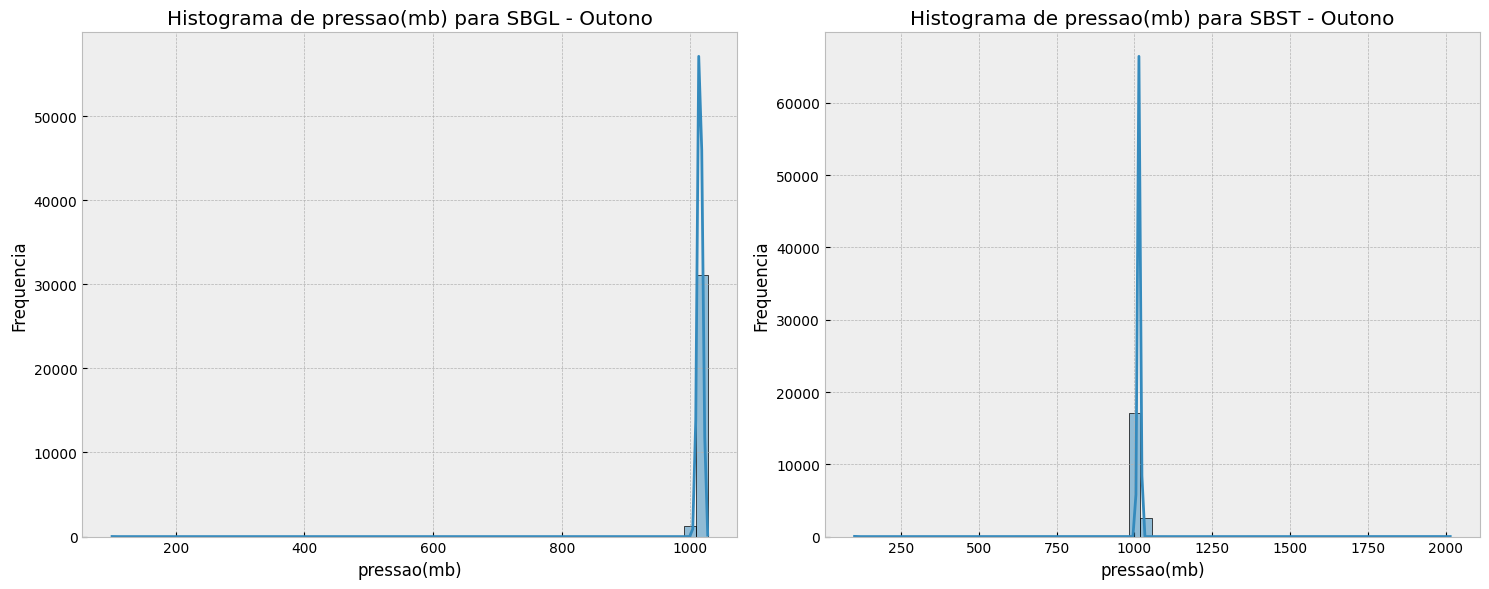

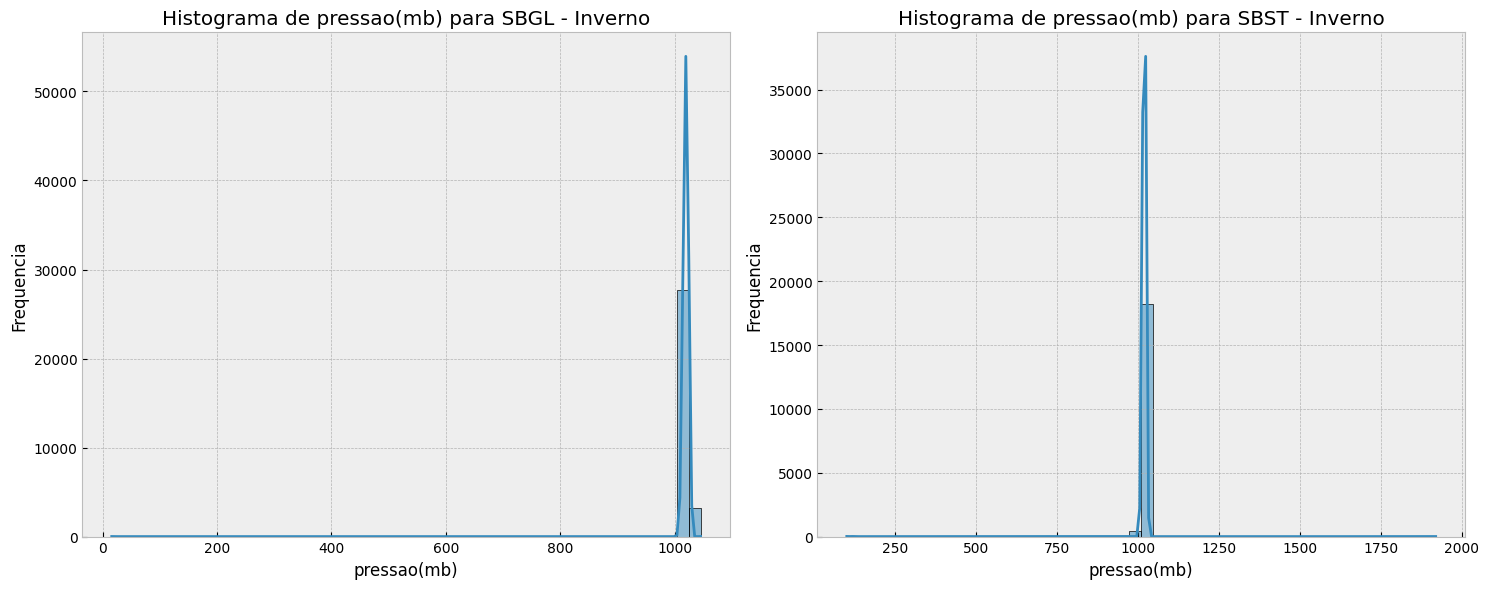

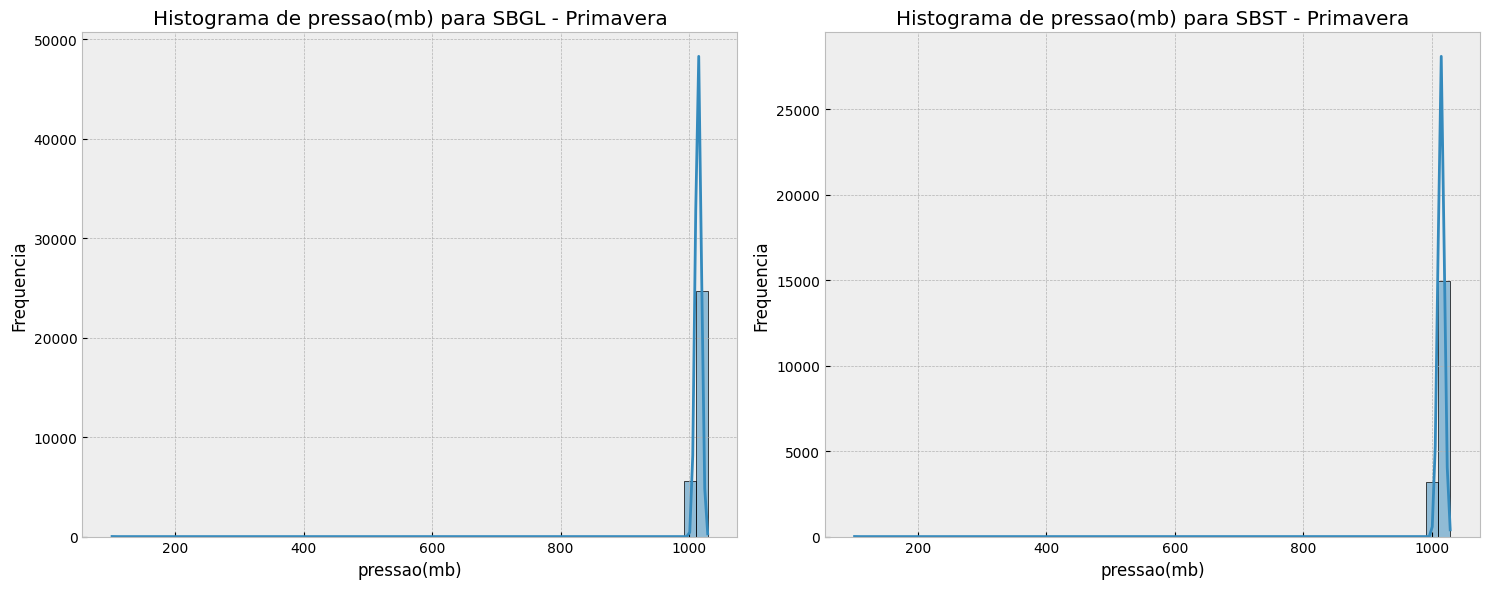

In [12]:

#converter para datatime
df_sbgl['datetime'] = pd.to_datetime(df_sbgl['datetime'], format='mixed')
df_sbst['datetime'] = pd.to_datetime(df_sbst['datetime'], format='mixed')

# funcao definir estacao
def get_estacao(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Verão'
    elif month in [3, 4, 5]:
        return 'Outono'
    elif month in [6, 7, 8]:
        return 'Inverno'
    else:
        return 'Primavera'

# adiciona coluna estacao
df_sbgl = df_sbgl.copy()
df_sbst = df_sbst.copy()
df_sbgl['estacao'] = df_sbgl['datetime'].apply(get_estacao)
df_sbst['estacao'] = df_sbst['datetime'].apply(get_estacao)


# colunas histograma
colunas_estacao = ['vis(m)', 'velocidade_vento(m/s)', 'pressao(mb)']

# gera os histogramas pra estacao dos dois dataframes
for col in colunas_estacao:
    for season in df_sbgl['estacao'].unique():
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # galeao
        sns.histplot(data=df_sbgl[df_sbgl['estacao'] == season], x=col, bins=50, kde=True, ax=axes[0], edgecolor='black')
        axes[0].set_title(f'Histograma de {col} para SBGL - {season}')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequencia')

        # santos
        sns.histplot(data=df_sbst[df_sbst['estacao'] == season], x=col, bins=50, kde=True, ax=axes[1], edgecolor='black')
        axes[1].set_title(f'Histograma de {col} para SBST - {season}')
        axes[1].set_xlabel(col)
        axes[1].set_ylabel('Frequencia')

        plt.tight_layout()
        plt.show()

## analise por ano

adicionar coluna ano

In [15]:
df_sbgl_limpo['datetime_sbgl'] = pd.to_datetime(df_sbgl_limpo['datetime_sbgl'], format='mixed')
df_sbst_limpo['datetime_sbst'] = pd.to_datetime(df_sbst_limpo['datetime_sbst'], format='mixed')

In [16]:
#adicionar coluna aano
df_sbgl_limpo = df_sbgl_limpo.copy()
df_sbst_limpo = df_sbst_limpo.copy()

df_sbgl_limpo['year'] = df_sbgl_limpo['datetime_sbgl'].dt.year
df_sbst_limpo['year'] = df_sbst_limpo['datetime_sbst'].dt.year


print("df_sbgl com coluna ano")
display(df_sbgl_limpo.head())

print("\ndf_sbst com coluna ano")
display(df_sbst_limpo.head())

df_sbgl com coluna ano


,datetime_sbgl,temp_agua(c)_sbgl,temp_ar(c)_sbgl,ponto_orvalho(c)_sbgl,velocidade_vento(m/s)_sbgl,dir_vento(graus)_sbgl,vis(m)_sbgl,pressao(mb)_sbgl,umidade_rel_sbgl,year
0,2011-01-01 00:00:00,25.252,26.0,23.0,2.572220,140.0,10000.0,1007.0,0.84,2011
1,2011-01-01 01:00:00,25.220,26.0,23.0,2.572220,110.0,10000.0,1008.0,0.84,2011
2,2011-01-01 02:00:00,25.186,25.0,22.0,2.572220,90.0,10000.0,1008.0,0.83,2011
3,2011-01-01 03:00:00,25.152,25.0,23.0,1.543332,160.0,10000.0,1007.0,0.89,2011
4,2011-01-01 04:00:00,25.117,25.0,23.0,2.057776,100.0,10000.0,1007.0,0.89,2011



df_sbst com coluna ano


,datetime_sbst,tipo_report_sbst,id_estacao_sbst,temp_ar(c)_sbst,ponto_orvalho(c)_sbst,velocidade_vento(m/s)_sbst,dir_vento(graus)_sbst,vis(m)_sbst,pressao(mb)_sbst,year
0,2011-01-02 08:00:00,METAR,SBST,23.0,21.0,5.144440,330.0,3000.0,1006.0,2011
1,2011-01-02 09:00:00,METAR,SBST,23.0,21.0,5.144440,340.0,2000.0,1006.0,2011
2,2011-01-02 10:00:00,METAR,SBST,23.0,21.0,2.057776,340.0,4000.0,1006.0,2011
3,2011-01-02 11:00:00,METAR,SBST,23.0,21.0,4.115552,10.0,4000.0,1007.0,2011
4,2011-01-02 12:00:00,METAR,SBST,24.0,21.0,5.144440,340.0,3000.0,1007.0,2011


## Tendencia das variaveis numericas ao longo dos anos

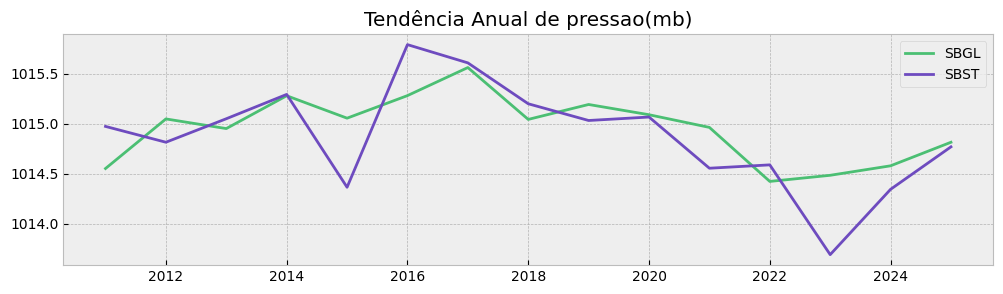

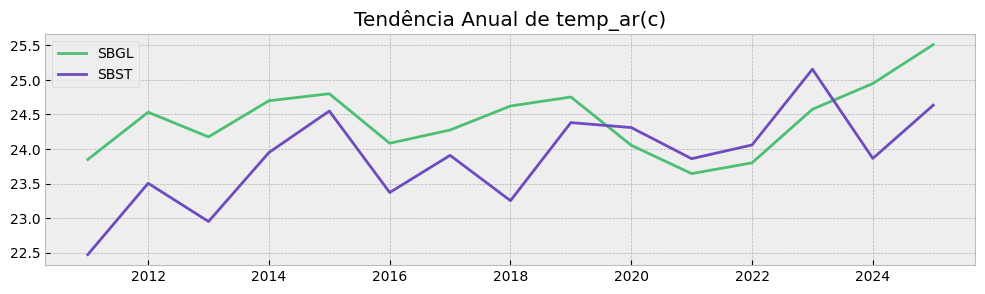

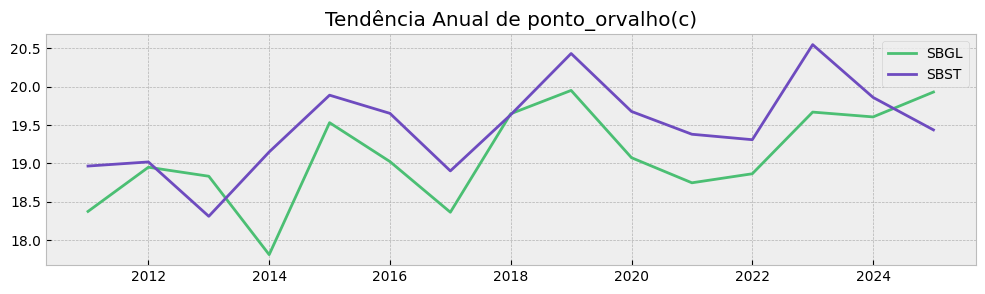

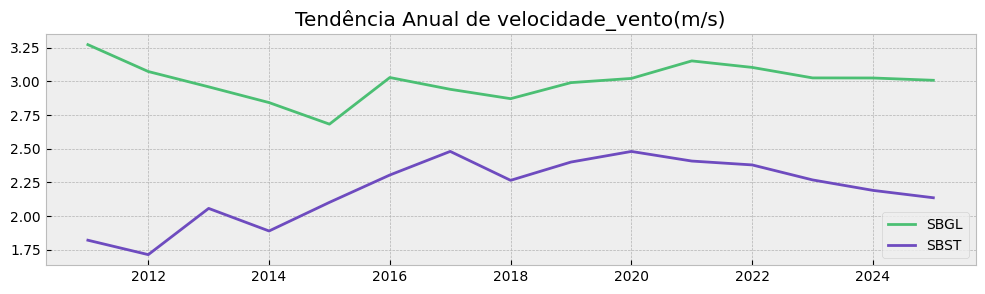

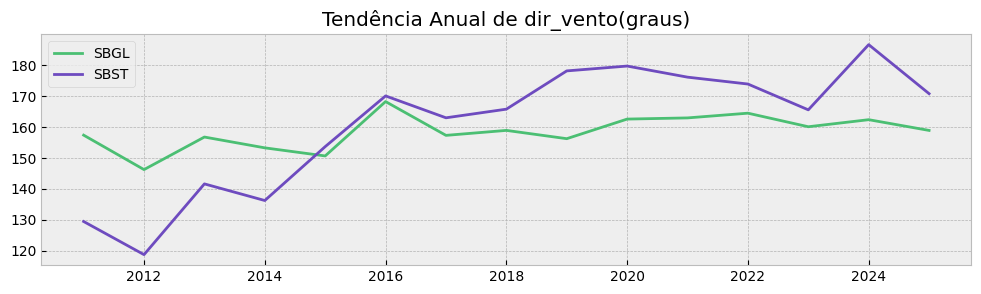

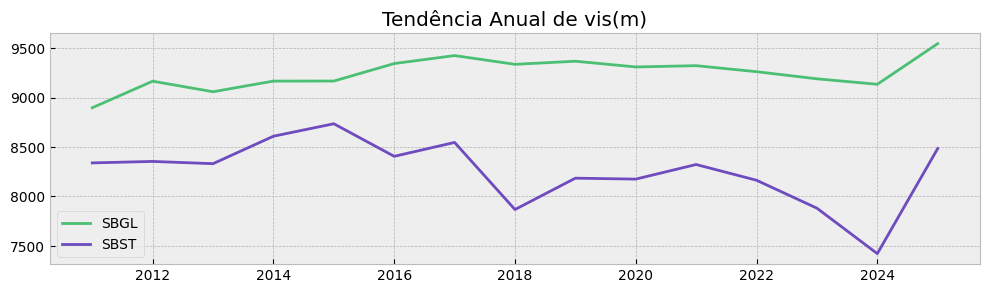

In [20]:
# lista colunas numericas
col_numericas = ['pressao(mb)','temp_ar(c)', 'ponto_orvalho(c)', 'velocidade_vento(m/s)', 'dir_vento(graus)', 'vis(m)']

for col in col_numericas:
    #Calcular a media anual para a coluna atual
    yearly_data_sbgl = df_sbgl_limpo.groupby('year')[[f'{col}_sbgl']].mean().reset_index()
    yearly_data_sbst = df_sbst_limpo.groupby('year')[[f'{col}_sbst']].mean().reset_index()

    #plotar tendencia anual
    plt.figure(figsize=(12, 3))
    sns.lineplot(data=yearly_data_sbgl, x='year', y=f'{col}_sbgl', label='SBGL', color='#4bbf73')
    sns.lineplot(data=yearly_data_sbst, x='year', y=f'{col}_sbst', label='SBST', color='#6e4bbf')
    plt.title(f'Tendência Anual de {col}')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:

sbgl_original = (127539, 9)
sbgl_limpo = (125592, 9)
sbst_original = (75570, 9)
sbst_limpo = (70034, 9)

# Contar linhas removidas
linhas_removidas_sbgl = sbgl_original[0] - sbgl_limpo[0]
linhas_removidas_sbst = sbst_original[0] - sbst_limpo[0]

# calcular a porcentagem de removido
porcentagem_sbgl = (linhas_removidas_sbgl / sbgl_original[0]) * 100
porcentagem_sbst = (linhas_removidas_sbst/ sbst_original[0]) * 100

# printar resultados
print("Análise da Completude dos Dados:")
print("-" * 30)
print(f"SBGL Original Rows: {sbgl_original[0]}")
print(f"SBGL Cleaned Rows: {sbgl_limpo[0]}")
print(f"SBGL Removed Rows: {linhas_removidas_sbgl}")
print(f"SBGL Percentage Removed: {porcentagem_sbgl:.2f}%")
print("-" * 30)
print(f"SBST Original Rows: {sbst_original[0]}")
print(f"SBST Cleaned Rows: {sbst_limpo[0]}")
print(f"SBST Removed Rows: {linhas_removidas_sbst}")
print(f"SBST Percentage Removed: {porcentagem_sbst:.2f}%")
print("-" * 30)
